# ALeRCE classes

https://github.com/ZwickyTransientFacility/ztf-avro-alert

1. **AGN:** Active Galactic Nuclei
1. **Blazar:** Blazar
1. **CV/Nova:** Cataclysmic Variable Star/Nova
1. **Ceph:** Cepheid Variable Star
1. **DSCT:** Delta Scuti Star
1. **EA:** Eclipsing Algol
1. **EB/EW:** Eclipsing Binaries/Eclipsing W Ursa Majoris
1. **LPV:** Long Period Variable
1. **Periodic-Other:** Periodic-Other
1. **QSO:** Quasi-Stellar Object
1. **RRL:** RRLyrae Variable Star
1. **RSCVn:** RS Canum Venaticorum
1. **SLSN:** Super Luminous Supernova
1. **SNII:** Supernova II
1. **SNIIb:** Supernova IIb
1. **SNIIn:** Supernova IIn
1. **SNIa:** Supernova Ia
1. **SNIbc:** Supernova Ibc
1. **TDE:** Tidal disruption event (to remove)
1. **YSO:** Young Stellar Object
1. **ZZ:** ZZ Ceti Stars (to remove)

In [1]:
import sys
sys.path.append('../../') # or just install the module
sys.path.append('../../../flaming-choripan') # or just install the module

In [2]:
%load_ext autoreload
%autoreload 2
from lchandler.survey_export.alerce_utils import process_df_labels, process_df_detections, keep_only_valid_objs
import numpy as np
import pandas as pd

load_rootdir = '../../../surveys-data'
survey_name = 'alerceZTFv7.1'
uses_corr = 0 # uses_corr=False only can be used with SNe objects
df_index_names = {
    'oid':'oid', # object id
    'oid_det':'objectId', # object id
    'label':'classALeRCE', # object class name
    'ra':'ra',
    'dec':'dec',
    'band':'fid', # band
    'obs_day':'mjd', # days
    'obs':'magpsf_corr' if uses_corr else 'magpsf', # observations
    'obs_error':'sigmapsf_corr' if uses_corr else 'sigmapsf', # observation errors
}
detections_cols = ['objectId', 'fid', 'mjd', df_index_names['obs'], df_index_names['obs_error']]

### load files and processing
detections_df = pd.read_parquet(f'{load_rootdir}/{survey_name}/detections_with_xmatch')
detections_df, det_objs = process_df_detections(detections_df, df_index_names['oid_det'], df_index_names['oid'], detections_cols, uses_corr=uses_corr)
print(f'detections_df - columns: {list(detections_df.columns)} - id: {detections_df.index.name}')

labels_df = pd.read_csv(f'{load_rootdir}/{survey_name}/dfcrossmatches_prioritized_v7.0.1.csv')
labels_df, label_objs = process_df_labels(labels_df, df_index_names['oid'], det_objs)
print(f'labels - columns: {list(labels_df.columns)} - id: {labels_df.index.name}')

outliers_df = pd.read_csv(f'{load_rootdir}/{survey_name}/outliers.csv')

### filter
valid_objs = list(set(det_objs) & set(label_objs))
labels_df = keep_only_valid_objs(labels_df, valid_objs)
detections_df = keep_only_valid_objs(detections_df, valid_objs)

### print info
classes = set(labels_df[df_index_names['label']].values)
print('classes:', classes)

../../lchandler/survey_export/alerce_utils.py:80: UserWarning: only use uses_corr=False with SNe objects
  warnings.warn('only use uses_corr=False with SNe objects')


detections_df - columns: ['fid', 'mjd', 'magpsf', 'sigmapsf'] - id: oid
labels - columns: ['classALeRCE', 'ra', 'dec', 'period', 'source', 'id_source', 'class_source', 'separation_arcsec'] - id: oid
classes: {'NLAGN', 'RSCVn', 'SNIa', 'RRL', 'SNIbc', 'Periodic-Other', 'SLSN', 'QSO', 'NLQSO', 'LPV', 'Blazar', 'SNIIn', 'ZZ', 'YSO', 'DSCT', 'AGN', 'Ceph', 'EA', 'EB/EW', 'SNII', 'SNIIb', 'TDE', 'CV/Nova'}


In [3]:
detections_df.info()
detections_df[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 6210462 entries, ZTF17aaaemke to ZTF20abefeou
Data columns (total 4 columns):
fid         int64
mjd         float64
magpsf      float32
sigmapsf    float32
dtypes: float32(2), float64(1), int64(1)
memory usage: 189.5+ MB


,fid,mjd,magpsf,sigmapsf
oid,,,,
ZTF17aaaemke,1,58679.445093,18.297556,0.107698
ZTF17aaaemke,1,58667.458588,18.762489,0.176661
ZTF17aaaemke,1,58811.170556,19.481199,0.276603
ZTF17aaaemke,1,58863.108241,19.077507,0.134806
ZTF17aaaemke,1,58820.147292,19.210100,0.281415
ZTF17aaaemke,1,58673.479028,18.959806,0.165157
ZTF17aaaemke,1,58431.211875,18.543581,0.138088
ZTF17aaaemke,2,58757.320671,18.332430,0.177623
ZTF17aaaemke,2,58667.463843,17.781448,0.086865


In [4]:
labels_df.info()
labels_df[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 122825 entries, ZTF19aapcxhy to ZTF18abgqxlw
Data columns (total 8 columns):
classALeRCE          122825 non-null object
ra                   122825 non-null float64
dec                  122825 non-null float64
period               77759 non-null object
source               122825 non-null object
id_source            122825 non-null object
class_source         122825 non-null object
separation_arcsec    122825 non-null float64
dtypes: float64(3), object(5)
memory usage: 8.4+ MB


,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,
ZTF19aapcxhy,AGN,154.202129,18.723076,NaN,Oh2015,5.877420127343739e+17,AGN_galaxy_dominated,0.227455
ZTF18abtyspw,AGN,25.660298,0.087434,NaN,Oh2015,5.880155092805878e+17,AGN_galaxy_dominated,0.141792
ZTF18abwtbad,AGN,51.846346,0.739559,NaN,Oh2015,5.877315136939624e+17,AGN_galaxy_dominated,0.084636
ZTF18abtmwvo,AGN,46.074050,0.474212,NaN,Oh2015,5.880155098263717e+17,AGN_galaxy_dominated,0.471111
ZTF18acvgdfy,AGN,134.407409,5.472596,NaN,Oh2015,5.877327033915148e+17,AGN_galaxy_dominated,0.087190
ZTF18aadyxlg,AGN,125.577004,33.091120,NaN,Oh2015,5.880133827239608e+17,AGN_galaxy_dominated,0.073570
ZTF19aapuscr,AGN,199.102327,-2.090396,NaN,Oh2015,5.87724649802236e+17,AGN_galaxy_dominated,0.038667
ZTF19aanxuxz,AGN,212.636953,-2.822530,NaN,Oh2015,5.877297769066006e+17,AGN_galaxy_dominated,0.181073
ZTF19aaaejth,AGN,141.748427,4.036104,NaN,Oh2015,5.880103596064113e+17,AGN_galaxy_dominated,0.097429


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


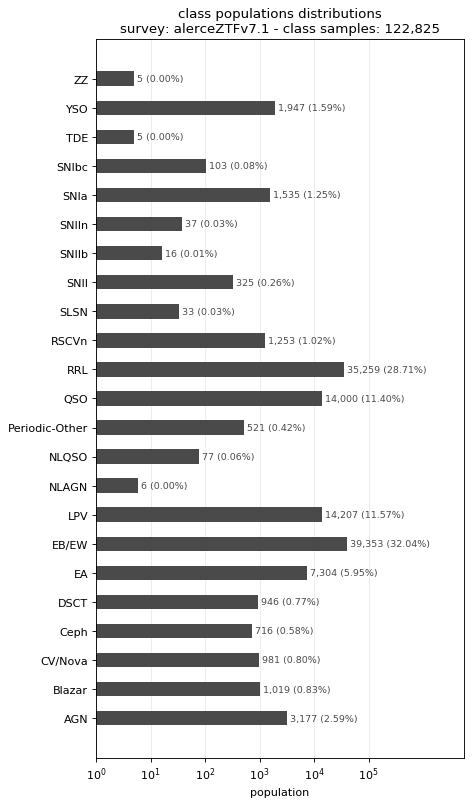

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from lchandler.survey_export.dictionary_creator import LightCurveDictionaryCreator

band_dictionary = {
    'g':1,
    'r':2,
}
args = [survey_name, detections_df, labels_df, band_dictionary, df_index_names]
kwargs = {
    'dataframe_obs_uses_flux':False,
    'zero_point':48.6,
}
lcDictionaryCreator = LightCurveDictionaryCreator(*args, **kwargs)
#print(lcDictionaryCreator)
lcDictionaryCreator.plot_class_distribution(uses_log_scale=1)

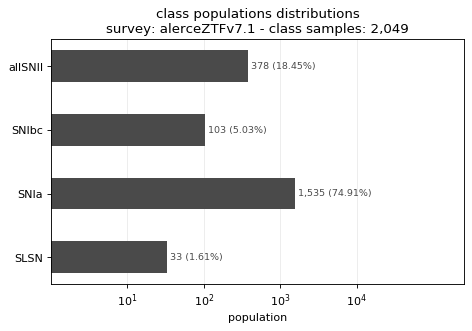

In [6]:
DF_SN_LIST = ['SLSN' ,'SNII', 'SNIIb', 'SNIIn', 'SNIa', 'SNIbc']

#mode = 'raw'
#mode = 'simple'
#mode = 'transients'
#mode = 'RRCeph'
mode = 'onlySNe'
#mode = 'onlySNIa'

if mode=='simple':
    invalid_classes = []
    query_classes = []
    to_merge_classes_dic = {'SN':DF_SN_LIST,}
    
elif mode=='onlySNe':
    kwargs = {
        'invalid_classes':[],
        'query_classes':DF_SN_LIST,
        'merge_classes_dict':{
            'allSNII':['SNII', 'SNIIb', 'SNIIn'],
        },
    }
    
elif mode=='onlySNIa':
    kwargs = {
        'invalid_classes':[],
        'query_classes':DF_SN_LIST,
        'merge_classes_dict':{
            'nonSNIa':['SLSN' ,'SNII', 'SNIIb', 'SNIIn', 'SNIbc'],
        },
    }

elif mode=='RRCeph':
    invalid_classes = []
    query_classes = ['RRL','Ceph']
    to_merge_classes_dic = {}

lcDictionaryCreator.update_labels_df(**kwargs)
lcDictionaryCreator.plot_class_distribution(uses_log_scale=1)

In [7]:
%load_ext autoreload
%autoreload 2

description = 'ZTF Alerce'
save_folder = f'../../../surveys-save/{survey_name}'
kwargs = {
    'band_names':list(band_dictionary.keys()),
    #'to_export_bands':['g','r'],
    'filename_extra_parameters':{
        'mode':mode,
    },
    'outliers_df':outliers_df,
}
lcdataset = lcDictionaryCreator.export_dictionary(description, save_folder, **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
band_names: ['g', 'r']
cleaning the DataFrame - samples: 6,210,462
remove_invalid_bands > samples: 6,209,963
remove_invalid_classes > samples: 65,179
remove_negative_obs > samples: 65,179
save_filedir: ../../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.ralcds
easy_label_dict: {'SLSN': 0, 'SNIa': 1, 'SNIbc': 2, 'allSNII': 3}
100%|██████████| 2049/2049 [00:08, 246.36it/s, obj: ZTF19adbsciy - y: 1 - c: SNIa - lengths_bdict: {'g': 9, 'r': 11} - correct_samples (any-band>=5): 2,047]     
> saving: ../../../surveys-save/alerceZTFv7.1/survey-alerceZTFv7.1_bands-gr_mode-onlySNe.ralcds


In [8]:
print(lcdataset)

LCDataset:
[outliers - samples 14]
(*) obs_samples: 714 - min_len: 10 - max_dur: 412.9[days] - dur(p50): 128.8[days] - cadence(p50): 0.9[days]
(g) obs_samples: 344 - min_len: 3 - max_dur: 408.0[days] - dur(p50): 127.8[days] - cadence(p50): 2.9[days]
(r) obs_samples: 370 - min_len: 6 - max_dur: 376.0[days] - dur(p50): 100.3[days] - cadence(p50): 3.0[days]
   |█▏      | SLSN - 2/14 (14.29%)
   |        | SNIa - 0/14 (0.00%)
   |██▊     | SNIbc - 5/14 (35.71%)
   |████    | allSNII - 7/14 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw - samples 2,033]
(*) obs_samples: 64,460 - min_len: 6 - max_dur: 538.8[days] - dur(p50): 52.9[days] - cadence(p50): 1.0[days]
(g) obs_samples: 28,007 - min_len: 0 - max_dur: 538.8[days] - dur(p50): 38.8[days] - cadence(p50): 3.0[days]
(r) obs_samples: 36,453 - min_len: 0 - max_dur: 538.8[days] - dur(p50): 50.8[days] - cadence(p50): 3.0[days]
   |        | SLSN - 31/2,033 (1.52%)
   |██████  

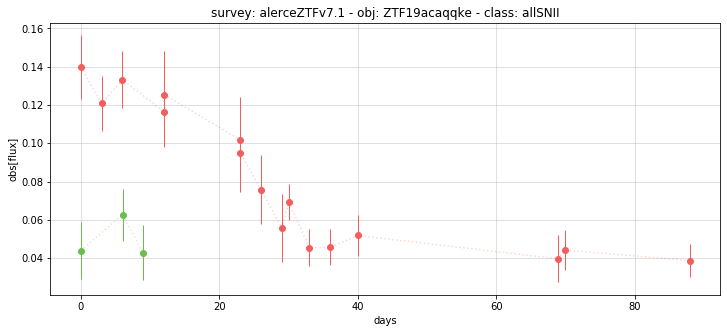

In [9]:
import flamingchoripan.lists as lists
import matplotlib.pyplot as plt
from lchandler.plots.lc import plot_lightcurve

lcset = lcdataset['raw']
lcobj, lcobj_name = lcset.get_random_lcobj()
fig, ax = plt.subplots(1,1, figsize=(12,5))
for kb,b in enumerate(lcset.band_names):
    plot_lightcurve(ax, lcobj, b)
ax.set_title(f'survey: {lcset.survey} - obj: {lcobj_name} - class: {lcset.class_names[lcobj.y]}')
ax.set_xlabel('days')
ax.set_ylabel('obs[flux]')
ax.grid(alpha=0.5)